In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm
import nglview as nv
import warnings
warnings.filterwarnings('ignore')

## NGLView with MolSysMT

In [3]:
molsys = msm.convert([nv.datafiles.GRO, nv.datafiles.XTC], to_form='molsysmt.MolSys')

In [4]:
view = nv.show_molsysmt(molsys)

In [5]:
view

NGLWidget(max_frame=50)

In [6]:
msm.info(view)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_proteins,n_frames
nglview.NGLWidget,5547,349,1,1,1,1,1,51


In [7]:
msm.get(view, target='group', indices=[81, 82, 83], name=True)

array(['VAL', 'ALA', 'ASH'], dtype=object)

In [8]:
msm.get(view, target='system', n_frames=True)

51

In [9]:
msm.get(view, target='atom', selection='atom_name=="CA"', frame_indices=10, coordinates=True)

Magnitude,[[[3.9540002346038814 4.586000442504883 1.128000020980835] [4.14300012588501 4.594000339508057 1.4530000686645506] [4.015000343322754 4.267000198364258 1.5950000286102293] ... [2.8210000991821285 3.9010002613067623 7.891000270843505] [2.731000185012817 4.266000270843506 7.873000144958495] [3.033000230789184 4.419000148773193 8.038000106811523]]]
Units,nanometer


In [10]:
msm.get(view, target='system', box=True) # Warning: only 1 frame

Magnitude,[[[8.092 0.0 0.0] [0.0 8.092 0.0] [0.0 0.0 9.651900000000001]] [[8.092 0.0 0.0] [0.0 8.092 0.0] [0.0 0.0 9.651900000000001]] [[8.092 0.0 0.0] [0.0 8.092 0.0] [0.0 0.0 9.651900000000001]] ... [[8.092 0.0 0.0] [0.0 8.092 0.0] [0.0 0.0 9.651900000000001]] [[8.092 0.0 0.0] [0.0 8.092 0.0] [0.0 0.0 9.651900000000001]] [[8.092 0.0 0.0] [0.0 8.092 0.0] [0.0 0.0 9.651900000000001]]]
Units,nanometer


In [11]:
msm.is_composed_of(view, proteins=1)

True

In [12]:
msm.select(view, selection='atom_name=="CA" and group_name=="LYS"')

array([ 226, 1053, 1075, 2235, 3652, 3851, 3898, 4965, 5214, 5405])

In [13]:
msm.select(view, selection='atom_name=="CA" and group_name=="LYS"', to_syntaxis='nglview')

'@226,1053,1075,2235,3652,3851,3898,4965,5214,5405'

In [14]:
msm.select(view, target='group', selection='group_name=="LYS"', to_syntaxis='nglview')

'17:1 67:1 68:1 142:1 232:1 246:1 249:1 312:1 326:1 340:1'

In [15]:
contact_map = msm.structure.get_contact_map(view, selection='molecule_type=="protein" and atom_name=="CA"', threshold='12 angstroms')

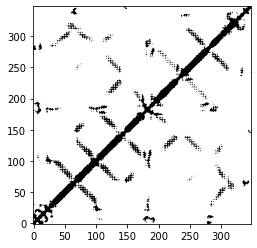

In [17]:
from matplotlib import pyplot as plt
plt.imshow(contact_map[10], cmap='Greys', origin='lower')
plt.show()

In [18]:
msm.convert(view, to_form='string:aminoacids1')

'XMNGTEGPNFYVPFSNKTGVVRSPFEAPQYYLAEPWQFSMLAAYMFLLIMLGFPINFLTLYVTVQHKKLRTPLNYILLNLAVAXLFMVFGGFTTTLYTSLHGYFVFGPTGCNLEGFFATLGGXIALWSLVVLAIERYVVVCKPMSNFRFGENHAIMGVAFTWVMALACAAPPLVGWSRYIPEGMQCSCGIDYYTPHEETNNESFVIYMFVVHFIIPLIVIFFCYGQLVFTVKEAAAQQQESATTQKAEKEVTRMVIIMVIAFLICWLPYAGVAFYIFTHQGSDFGPIFMTIPAFFAXTSAVYNPVIYIMMNKQFRNCMVTTLXXGKNPLGDDEASTTVSKTETSQVAPA'

In [19]:
molsys_A = msm.build.build_peptide(['AceAlaNME',{'forcefield':'AMBER14', 'implicit_solvent':'OBC1'}])
molsys_B = msm.structure.translate(molsys_A, translation='[0.5, 0.0, 0.0] nm')

In [20]:
view1 = msm.convert(molsys_A, to_form='nglview.NGLWidget')
view2 = msm.view(molsys_B)

In [35]:
view = msm.merge([view1, view2])

<class 'nglview.widget.NGLWidget'> <molsysmt.native.molsys.MolSys object at 0x7f77a8bb6e10> <molsysmt.native.molsys.MolSys object at 0x7f773e7a4750>


NotImplementedConversionError: The conversion from [] to string:pdb has not been implemeted yet. Write a new issue in https://github.com/uibcdf/MolSysMT/issues asking for it.

In [ ]:
view = msm.concatenate_frames(view1, view2)

In [ ]:
molsys = msm.convert([nv.datafiles.GRO, nv.datafiles.XTC], to_form='molsysmt.MolSys')

In [ ]:
print(msm.convert(molsys, to_form='string:pdb'))

In [ ]:
molsys = msm.convert([nv.datafiles.GRO, nv.datafiles.XTC], to_form='mdtraj.Trajectory')

In [ ]:
import mdtraj

In [ ]:
mdtraj.load(nv.datafiles.GRO)

In [ ]:
nv.datafiles.GRO

In [ ]:
nv.datafiles.XTC

In [ ]:
mdtraj.load(nv.datafiles.GRO)

In [ ]:
molsys